In [2]:
import numpy as np
import pandas as pd
# import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
# import plotly.express as px
import warnings

# from sklearn import datasets
# from collections import Counter
# import statsmodels.api as sm
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Cleaning

In [3]:
# Load dataset
input_file = r"./data/medical_insurance.csv"
df_csv = pd.read_csv(input_file, header = 0)
original_headers = list(df_csv.columns.values)


# reverse the order of the columns
original_headers.reverse()
df = df_csv[original_headers]
df

,premium,expenses,region,discount_eligibility,children,bmi,gender,age
0,168.8492,16884.92,southwest,yes,0,27.9,female,19
1,17.2555,1725.55,southeast,no,1,33.8,male,18
2,44.4946,4449.46,southeast,no,3,33.0,male,28
3,439.6894,21984.47,northwest,no,0,22.7,male,33
4,77.3372,3866.86,northwest,no,0,28.9,male,32
...,...,...,...,...,...,...,...,...
1333,212.0110,10600.55,northwest,no,3,31.0,male,50
1334,22.0598,2205.98,northeast,no,0,31.9,female,18
1335,16.2983,1629.83,southeast,no,0,36.9,female,18
1336,20.0795,2007.95,southwest,no,0,25.8,female,21


In [4]:
# Information dataset
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   premium               1338 non-null   float64
 1   expenses              1338 non-null   float64
 2   region                1338 non-null   object 
 3   discount_eligibility  1338 non-null   object 
 4   children              1338 non-null   int64  
 5   bmi                   1338 non-null   float64
 6   gender                1338 non-null   object 
 7   age                   1338 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


(None, (1338, 8))

In [5]:
# Summary stats
df.describe()

,premium,expenses,children,bmi,age
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,262.874685,13270.422414,1.094918,30.665471,39.207025
std,292.532178,12110.011240,1.205493,6.098382,14.049960
min,11.218700,1121.870000,0.000000,16.000000,18.000000
25%,87.354250,4740.287500,0.000000,26.300000,27.000000
50%,174.997400,9382.030000,1.000000,30.400000,39.000000
75%,342.908900,16639.915000,2.000000,34.700000,51.000000
max,1983.106400,63770.430000,5.000000,53.100000,64.000000


In [6]:
# Missing values 
# Check Null Values
df.isnull().sum()

premium                 0
expenses                0
region                  0
discount_eligibility    0
children                0
bmi                     0
gender                  0
age                     0
dtype: int64

In [7]:
## Getting All Different Types of Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Num of Discrete Features :', len(discrete_features))
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :', len(continuous_features))

Num of Numerical Features : 5
Num of Categorical Features : 3
Num of Discrete Features : 1
Num of Continuous Features : 4


## Feature Encoding and Scaling

In [9]:
len(df['region'].unique()), len(df['discount_eligibility'].unique()), len(df['gender'].unique())

(4, 2, 2)

In [10]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## Visualization

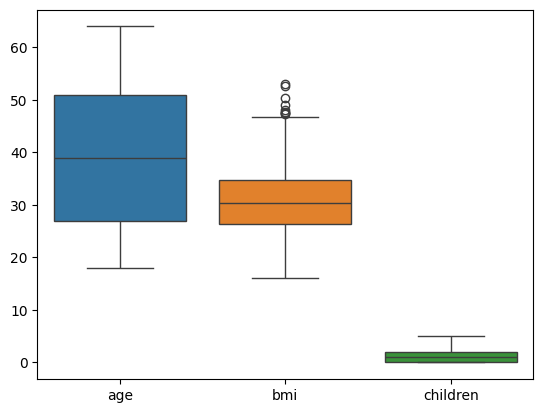

In [11]:
# Box plots
sns.boxplot(data=df[['age', 'bmi', 'children']])
plt.show()

In [13]:
# Since we have a small dataset, we should not remove the outliers, but instead use methods that are robust to them.

Q1 = df['bmi'].quantile(0.25)  
Q3 = df['bmi'].quantile(0.75)  
IQR = Q3 - Q1  

outliers = df[(df['bmi'] < Q1 - 1.5*IQR) | (df['bmi'] > Q3 + 1.5*IQR)]
outliers

,premium,expenses,region,discount_eligibility,children,bmi,gender,age
116,227.6266,11381.33,southeast,no,0,49.1,male,58
286,188.6586,9432.93,northeast,no,2,48.1,female,46
401,161.6784,8083.92,southeast,no,1,47.5,male,47
543,1275.4086,63770.43,southeast,yes,0,47.4,female,54
847,24.3806,2438.06,southeast,no,1,50.4,male,23
860,922.2702,46113.51,southwest,yes,2,47.6,female,37
1047,445.0140,44501.40,southeast,yes,1,52.6,male,22
1088,194.9782,9748.91,southeast,no,1,47.7,male,52
1317,11.6346,1163.46,southeast,no,0,53.1,male,18


In [14]:
outliers['bmi'] = Q3
outliers


,premium,expenses,region,discount_eligibility,children,bmi,gender,age
116,227.6266,11381.33,southeast,no,0,34.7,male,58
286,188.6586,9432.93,northeast,no,2,34.7,female,46
401,161.6784,8083.92,southeast,no,1,34.7,male,47
543,1275.4086,63770.43,southeast,yes,0,34.7,female,54
847,24.3806,2438.06,southeast,no,1,34.7,male,23
860,922.2702,46113.51,southwest,yes,2,34.7,female,37
1047,445.0140,44501.40,southeast,yes,1,34.7,male,22
1088,194.9782,9748.91,southeast,no,1,34.7,male,52
1317,11.6346,1163.46,southeast,no,0,34.7,male,18


In [15]:
df_clean = df[(df['bmi'] >= Q1 - 1.5*IQR) & (df['bmi'] <= Q3 + 1.5*IQR)]
df_clean

,premium,expenses,region,discount_eligibility,children,bmi,gender,age
0,168.8492,16884.92,southwest,yes,0,27.9,female,19
1,17.2555,1725.55,southeast,no,1,33.8,male,18
2,44.4946,4449.46,southeast,no,3,33.0,male,28
3,439.6894,21984.47,northwest,no,0,22.7,male,33
4,77.3372,3866.86,northwest,no,0,28.9,male,32
...,...,...,...,...,...,...,...,...
1333,212.0110,10600.55,northwest,no,3,31.0,male,50
1334,22.0598,2205.98,northeast,no,0,31.9,female,18
1335,16.2983,1629.83,southeast,no,0,36.9,female,18
1336,20.0795,2007.95,southwest,no,0,25.8,female,21


In [16]:
df_combined = pd.concat([df_clean, outliers])
df_combined.reset_index(drop=True, inplace=True)
df_combined

,premium,expenses,region,discount_eligibility,children,bmi,gender,age
0,168.8492,16884.92,southwest,yes,0,27.9,female,19
1,17.2555,1725.55,southeast,no,1,33.8,male,18
2,44.4946,4449.46,southeast,no,3,33.0,male,28
3,439.6894,21984.47,northwest,no,0,22.7,male,33
4,77.3372,3866.86,northwest,no,0,28.9,male,32
...,...,...,...,...,...,...,...,...
1333,24.3806,2438.06,southeast,no,1,34.7,male,23
1334,922.2702,46113.51,southwest,yes,2,34.7,female,37
1335,445.0140,44501.40,southeast,yes,1,34.7,male,22
1336,194.9782,9748.91,southeast,no,1,34.7,male,52


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_vis = df_combined[:]
df_vis["gender"] = label_encoder.fit_transform(df_combined["gender"])
df_vis["region"] = label_encoder.fit_transform(df_combined["region"])
df_vis["discount_eligibility"] = label_encoder.fit_transform(df_combined["discount_eligibility"])

In [18]:
df_combined

,premium,expenses,region,discount_eligibility,children,bmi,gender,age
0,168.8492,16884.92,southwest,yes,0,27.9,female,19
1,17.2555,1725.55,southeast,no,1,33.8,male,18
2,44.4946,4449.46,southeast,no,3,33.0,male,28
3,439.6894,21984.47,northwest,no,0,22.7,male,33
4,77.3372,3866.86,northwest,no,0,28.9,male,32
...,...,...,...,...,...,...,...,...
1333,24.3806,2438.06,southeast,no,1,34.7,male,23
1334,922.2702,46113.51,southwest,yes,2,34.7,female,37
1335,445.0140,44501.40,southeast,yes,1,34.7,male,22
1336,194.9782,9748.91,southeast,no,1,34.7,male,52


In [19]:
df_vis

,premium,expenses,region,discount_eligibility,children,bmi,gender,age
0,168.8492,16884.92,3,1,0,27.9,0,19
1,17.2555,1725.55,2,0,1,33.8,1,18
2,44.4946,4449.46,2,0,3,33.0,1,28
3,439.6894,21984.47,1,0,0,22.7,1,33
4,77.3372,3866.86,1,0,0,28.9,1,32
...,...,...,...,...,...,...,...,...
1333,24.3806,2438.06,2,0,1,34.7,1,23
1334,922.2702,46113.51,3,1,2,34.7,0,37
1335,445.0140,44501.40,2,1,1,34.7,1,22
1336,194.9782,9748.91,2,0,1,34.7,1,52


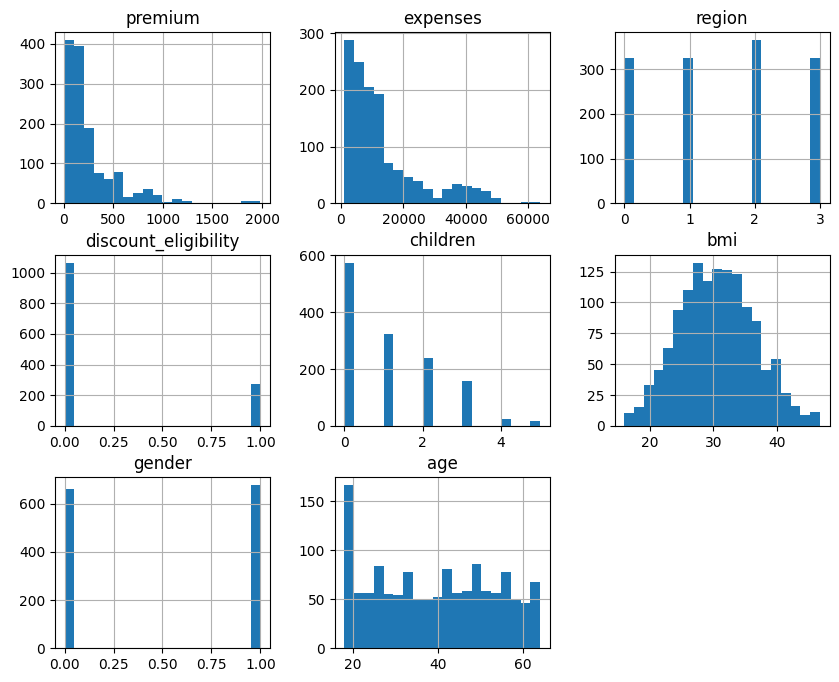

In [20]:
# Histograms
df_vis.hist(bins=20, figsize=(10, 8))
plt.show()

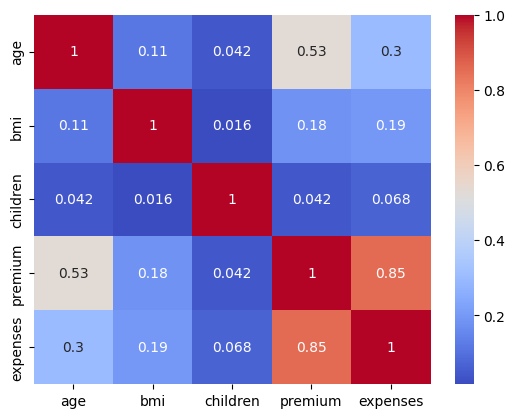

In [21]:
# Correlation heatmap
sns.heatmap(df_vis[['age', 'bmi', 'children', 'premium', 'expenses']].corr(), annot=True, cmap='coolwarm')
plt.show()

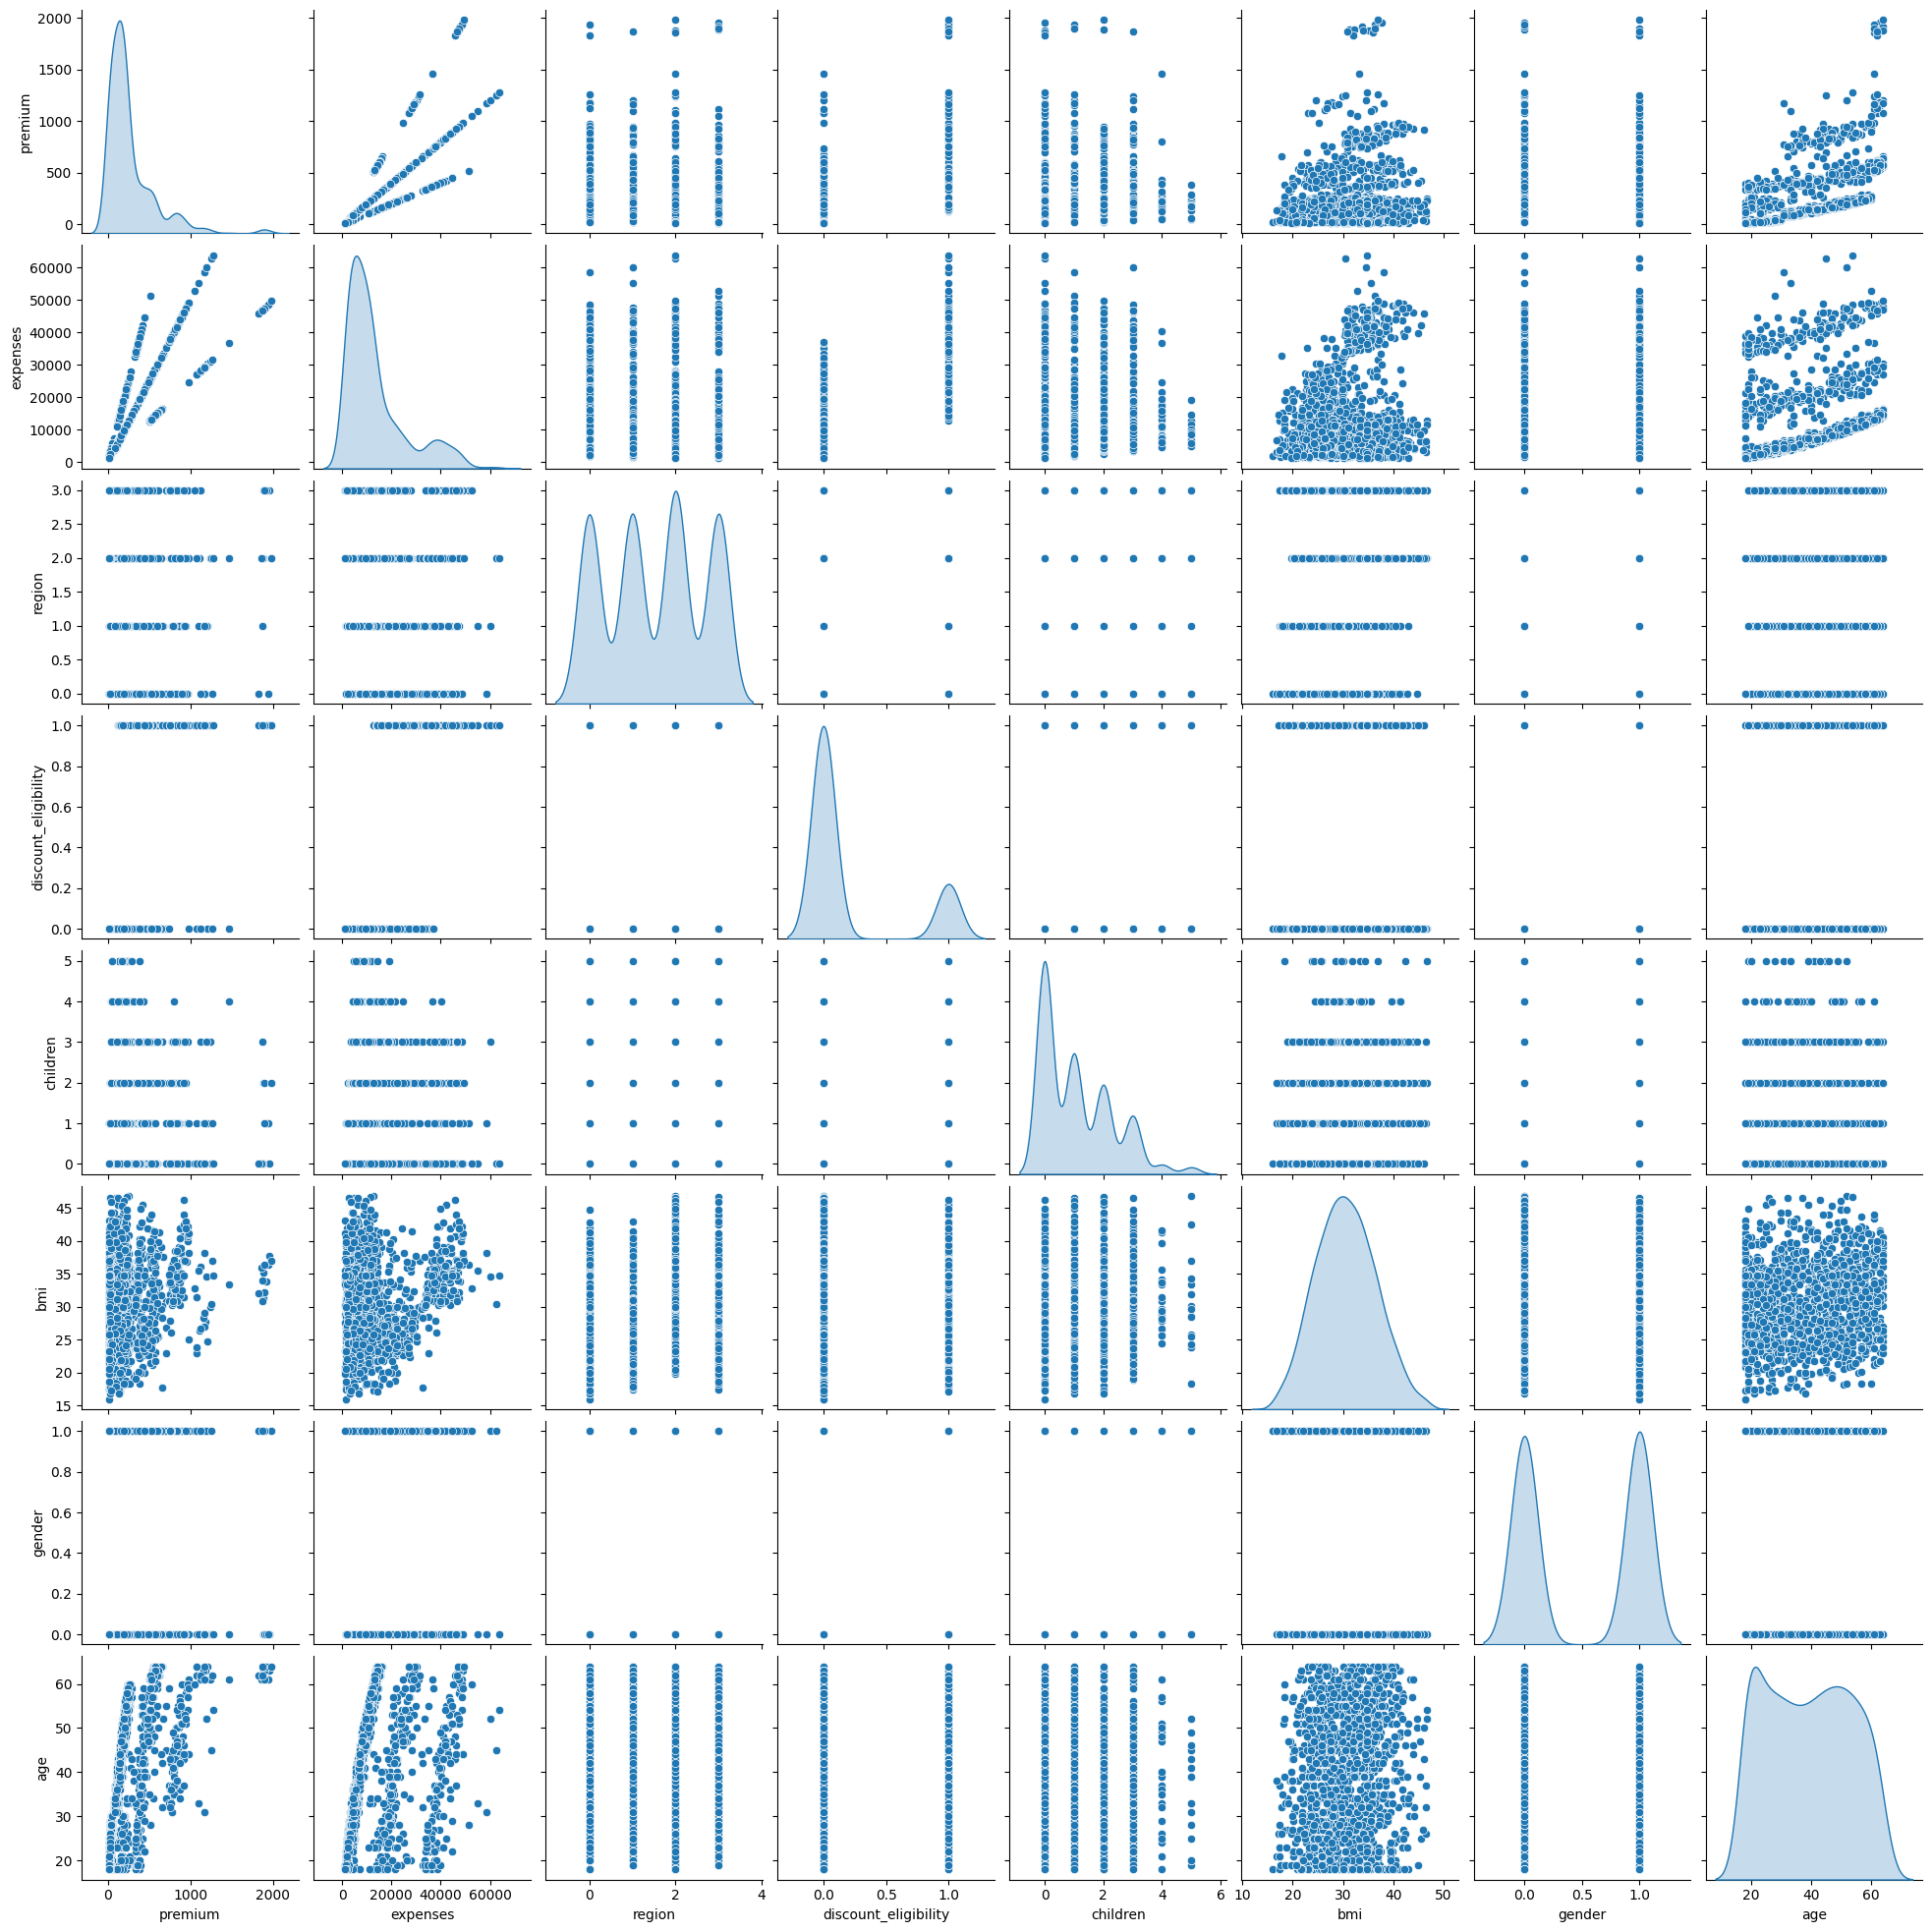

In [22]:
# Pairplot
sns.pairplot(df_vis, diag_kind='kde')
plt.show()

<Axes: ylabel='Count'>

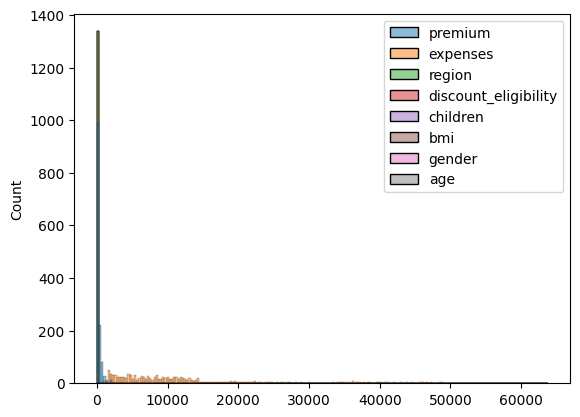

In [23]:
sns.histplot(df_vis)

<Axes: >

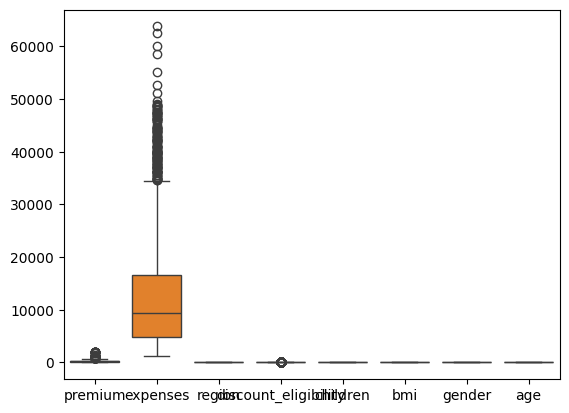

In [24]:
sns.boxplot(df_vis)

<Axes: ylabel='expenses'>

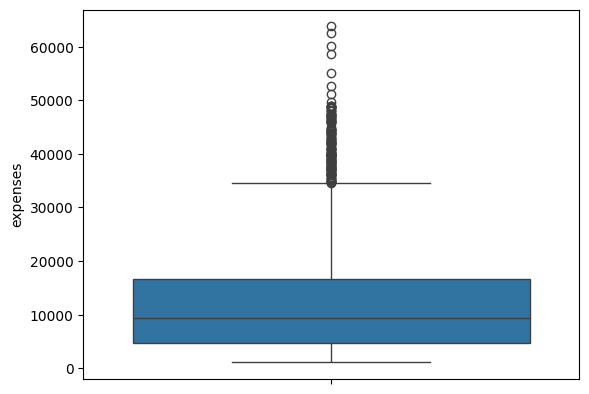

In [25]:
sns.boxplot(df_vis['expenses'])

<Axes: ylabel='premium'>

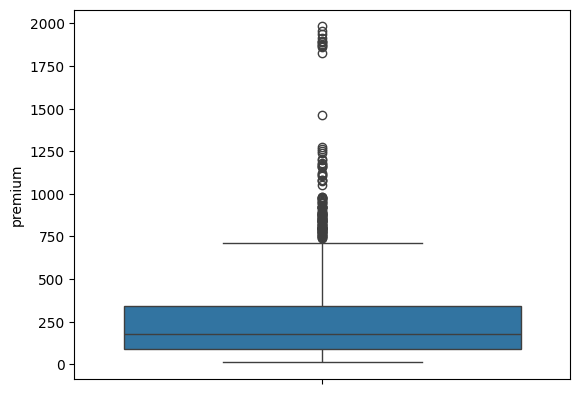

In [26]:
sns.boxplot(df_vis['premium'])

<Axes: >

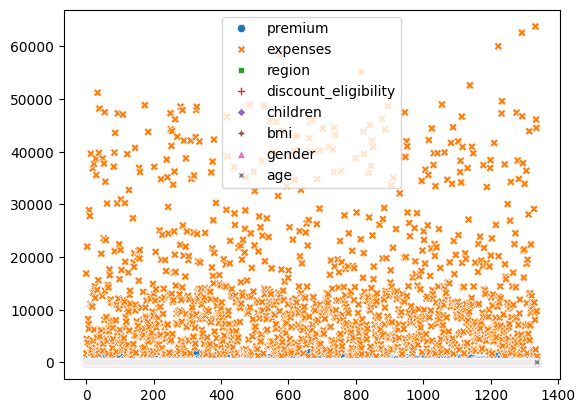

In [28]:
# scatter plot
sns.scatterplot(df_vis)

<Axes: >

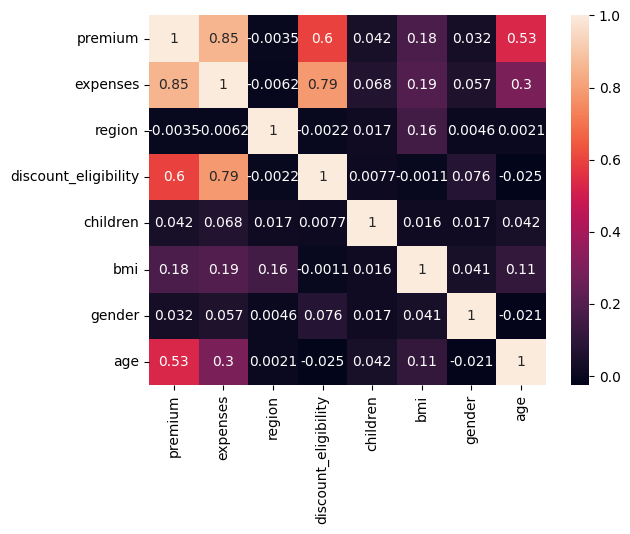

In [29]:
sns.heatmap(df_vis.corr(), annot=True)

# Pre-Processing

### premium

In [106]:
# Independent & dependent feature
from sklearn.model_selection import train_test_split

X = df_combined.iloc[:,2:8]
# X = df_combined.drop(['expenses', 'premium'], axis='columns') # Independent features
y_premium = df_combined.iloc[:,0:1]
# y_premium = df_combined[['premium']] # dependent features

X.shape, X.head(10), y_premium.shape, y_premium.head(10)

((1338, 6),
       region discount_eligibility  children   bmi  gender  age
 0  southwest                  yes         0  27.9  female   19
 1  southeast                   no         1  33.8    male   18
 2  southeast                   no         3  33.0    male   28
 3  northwest                   no         0  22.7    male   33
 4  northwest                   no         0  28.9    male   32
 5  southeast                   no         0  25.7  female   31
 6  southeast                   no         1  33.4  female   46
 7  northwest                   no         3  27.7  female   37
 8  northeast                   no         2  29.8    male   37
 9  northwest                   no         0  25.8  female   60,
 (1338, 1),
     premium
 0  168.8492
 1   17.2555
 2   44.4946
 3  439.6894
 4   77.3372
 5   75.1324
 6  164.8118
 7  145.6302
 8  128.1282
 9  578.4628)

In [107]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['region', 'discount_eligibility', 'gender']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ], remainder='passthrough'
)

In [108]:
X = preprocessor.fit_transform(X)

In [109]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,1.0,0.0,-0.908614,-0.451508,-1.438764
1,0.0,1.0,0.0,0.0,1.0,-0.078767,0.547173,-1.509965
2,0.0,1.0,0.0,0.0,1.0,1.580926,0.411759,-0.797954
3,1.0,0.0,0.0,0.0,1.0,-0.908614,-1.331700,-0.441948
4,1.0,0.0,0.0,0.0,1.0,-0.908614,-0.282240,-0.513149
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,1.0,-0.078767,0.699514,-1.153959
1334,0.0,0.0,1.0,1.0,0.0,0.751079,0.699514,-0.157143
1335,0.0,1.0,0.0,1.0,1.0,-0.078767,0.699514,-1.225161
1336,0.0,1.0,0.0,0.0,1.0,-0.078767,0.699514,0.910875


In [110]:
## Imbalanced dataset
X, y_premium = make_regression(n_samples=3000, n_features=8, noise=1, random_state=42)
X

array([[ 5.51706379e-02,  2.14110982e-01,  2.91732725e-01, ...,
        -6.08482322e-04,  4.89130557e-01, -1.50755294e+00],
       [-2.47707198e-01,  3.40864599e-01,  1.90083182e+00, ...,
         3.99066945e-02, -3.59905537e-01, -1.78494397e+00],
       [ 2.83202637e-02,  1.02795900e+00, -2.37312234e-01, ...,
         4.21360254e-01, -3.92047783e-01,  1.63712179e+00],
       ...,
       [-1.83810757e+00, -1.18740615e+00, -3.05650095e-01, ...,
        -4.58766830e-01, -1.18096362e+00,  1.69142172e-02],
       [ 1.20702651e+00,  1.18064323e+00, -1.01447749e+00, ...,
         1.58261904e+00,  1.22092096e-01,  6.61788319e-02],
       [ 1.55579469e-01, -5.49554396e-01,  1.20321278e+00, ...,
        -1.07075438e+00,  2.78204596e-01, -1.98629061e+00]],
      shape=(3000, 8))

In [111]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,0.055171,0.214111,0.291733,1.516116,1.196627,-0.000608,0.489131,-1.507553
1,-0.247707,0.340865,1.900832,-0.766870,-1.142791,0.039907,-0.359906,-1.784944
2,0.028320,1.027959,-0.237312,0.623236,-1.015292,0.421360,-0.392048,1.637122
3,1.344106,-0.106199,-0.222522,0.177661,1.232909,0.474584,1.136535,-0.172603
4,-0.583626,-1.297212,-0.081551,-0.611730,0.370706,-1.347343,0.160135,0.227754
...,...,...,...,...,...,...,...,...
2995,-0.469131,1.272570,0.510157,0.666270,-1.445205,-0.992866,0.126314,0.577979
2996,-0.071599,0.849102,0.695538,0.890383,-0.357029,-1.517874,-0.293967,0.575205
2997,-1.838108,-1.187406,-0.305650,0.787553,-0.384223,-0.458767,-1.180964,0.016914
2998,1.207027,1.180643,-1.014477,-0.315064,0.084798,1.582619,0.122092,0.066179


In [112]:
pd.DataFrame(y_premium)

,0
0,77.691410
1,-203.300260
2,94.072758
3,147.867083
4,-48.766941
...,...
2995,39.403041
2996,30.171233
2997,-100.249107
2998,52.876077


<Axes: xlabel='premium', ylabel='Density'>

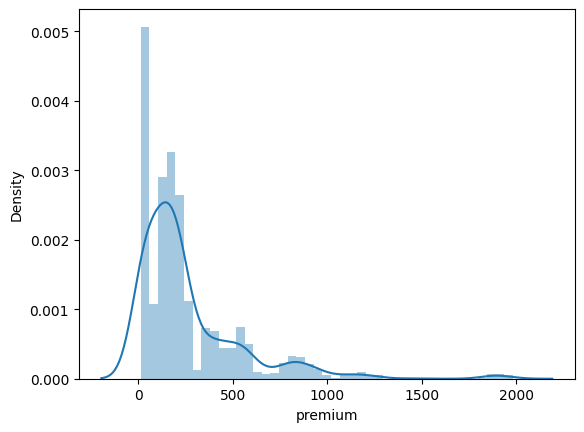

In [113]:
sns.distplot(df_combined.premium)

<Axes: ylabel='Density'>

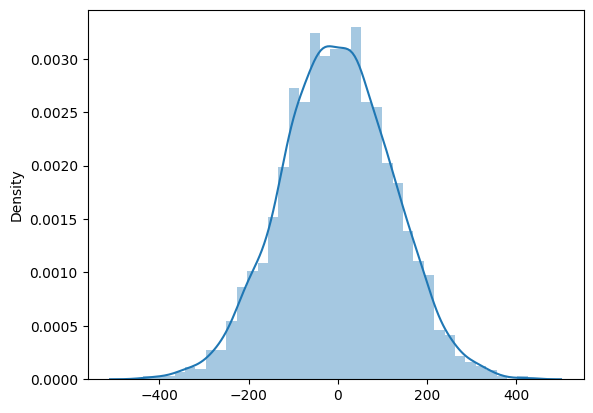

In [114]:
sns.distplot(pd.DataFrame(y_premium))

In [115]:
# Separate dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_premium_train, y_premium_test = train_test_split(X, y_premium, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_premium_test.shape, y_premium_train.shape, X[0]

((2400, 8),
 (600, 8),
 (600,),
 (2400,),
 array([ 5.51706379e-02,  2.14110982e-01,  2.91732725e-01,  1.51611618e+00,
         1.19662712e+00, -6.08482322e-04,  4.89130557e-01, -1.50755294e+00]))

### expenses

In [116]:
# Independent & dependent features
y_expenses = df_combined.iloc[:,1:2]

y_expenses.shape, y_expenses.head(10)

((1338, 1),
    expenses
 0  16884.92
 1   1725.55
 2   4449.46
 3  21984.47
 4   3866.86
 5   3756.62
 6   8240.59
 7   7281.51
 8   6406.41
 9  28923.14)

In [118]:
## Imbalanced dataset
X, y_expenses = make_regression(n_samples=3000, n_features=8, noise=1, random_state=42)

In [119]:
pd.DataFrame(y_expenses)

,0
0,77.691410
1,-203.300260
2,94.072758
3,147.867083
4,-48.766941
...,...
2995,39.403041
2996,30.171233
2997,-100.249107
2998,52.876077


<Axes: xlabel='expenses', ylabel='Density'>

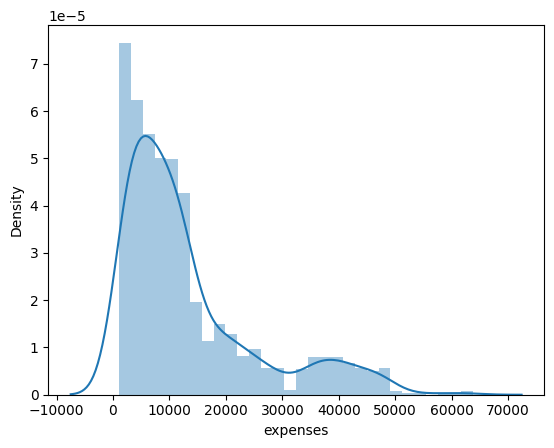

In [120]:
sns.distplot(df_combined.expenses)

<Axes: ylabel='Density'>

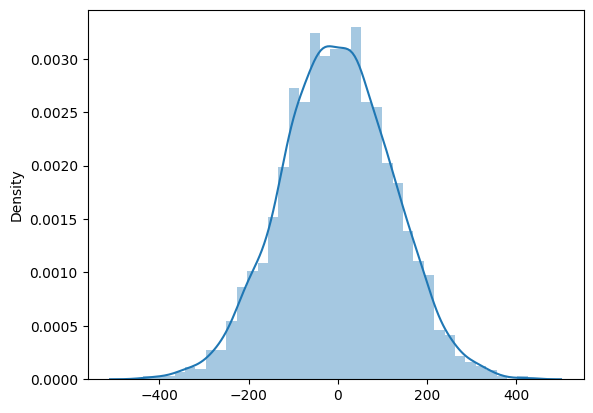

In [121]:
sns.distplot(pd.DataFrame(y_expenses))

# Model Training And Model Selection

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import explained_variance_score

In [125]:
## Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    p = len(y_premium_test)
    n = X_test.shape[1]
    adj_r2 = 1-((1-r2_square)*((p-1)/(p-n-1)))
    variance = explained_variance_score(true, predicted)
    return mae, rmse, r2_square, adj_r2, variance

In [126]:
## Beginning Model Training
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Xgboost Regressor": XGBRegressor()
}

### premium

In [127]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_premium_train)    # Train model

    # Make predictions
    y_premium_train_pred = model.predict(X_train)
    y_premium_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2_square, model_train_adj_r2, model_train_variance = evaluate_model(y_premium_train, y_premium_train_pred)

    model_test_mae, model_test_rmse, model_test_r2_square, model_test_adj_r2, model_test_variance = evaluate_model(y_premium_test, y_premium_test_pred)

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_square))
    print("- Adj R2: {:.4f}".format(model_train_adj_r2))
    print("- Variance: {:.4f}".format(model_train_variance))


    print('------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_square))
    print("- Adj R2: {:.4f}".format(model_test_adj_r2))
    print("- Variance: {:.4f}".format(model_test_variance))


    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 10.8805
- Mean Absolute Error: 8.1396
- R2 Score: 0.9922
- Adj R2: 0.9921
- Variance: 0.9922
------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.9122
- Mean Absolute Error: 22.5619
- R2 Score: 0.9409
- Adj R2: 0.9401
- Variance: 0.9409


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 33.7475
- Mean Absolute Error: 25.9705
- R2 Score: 0.9252
- Adj R2: 0.9242
- Variance: 0.9252
------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 42.9600
- Mean Absolute Error: 32.8650
- R2 Score: 0.8780
- Adj R2: 0.8764
- Variance: 0.8782


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
- Adj R2: 1.0000
- Variance: 1.0000
------------------------------------------
Model performance for Test set
- Root 

In [128]:
# Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {
    "max_depth": [5, 8, 10, 15, 20, 25, None],
    "max_features": [5, 7, "auto", 8, 11, 14],
    "min_samples_split": [1, 2, 3, 4, 8, 15, 20],
    "n_estimators": [100, 200, 400, 500, 600, 1000]
}
xgboost_params = {
    "learning_rate": [0.1, 0.2, 0.09, 0.08, 0.07, 0.01],
    "max_depth": [1, 2, 3, 4, 5, 8, 12, 20, 30],
    "n_estimators": [50, 100, 150, 200, 300],
    "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4, 2]
}

In [129]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('KNN', KNeighborsRegressor(), knn_params),
    ("RF", RandomForestRegressor(), rf_params),
    ("XGboost", XGBRegressor(), xgboost_params)
]

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator = model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train, y_premium_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"------------------ Best Params for {model_name} -------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------ Best Params for KNN -------------------------
{'n_neighbors': 10}
------------------ Best Params for RF -------------------------
{'n_estimators': 600, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 15}
------------------ Best Params for XGboost -------------------------
{'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.2, 'colsample_bytree': 0.3}


In [130]:
# Retraining the models with best parameters
models = {
    "K_Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1),

    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=600,
        min_samples_split=2,
        max_features=5,
        max_depth=15,
        n_jobs=-1
    ),
    
    "XGboost": XGBRegressor(
        learning_rate=0.2,
        max_depth=2,
        n_estimators=300,
        colsample_bytree=0.3
    )
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_premium_train)    # Train model

    # Make predictions
    y_premium_train_pred = model.predict(X_train)
    y_premium_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2_square, model_train_adj_r2, model_train_variance = evaluate_model(y_premium_train, y_premium_train_pred)

    model_test_mae, model_test_rmse, model_test_r2_square, model_test_adj_r2, model_test_variance = evaluate_model(y_premium_test, y_premium_test_pred)

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_square))
    print("- Adj R2: {:.4f}".format(model_train_adj_r2))
    print("- Variance: {:.4f}".format(model_train_variance))


    print('------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_square))
    print("- Adj R2: {:.4f}".format(model_test_adj_r2))
    print("- Variance: {:.4f}".format(model_test_variance))


    print('='*35)
    print('\n')

K_Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 37.3173
- Mean Absolute Error: 28.1465
- R2 Score: 0.9086
- Adj R2: 0.9073
- Variance: 0.9086
------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 42.5768
- Mean Absolute Error: 32.1317
- R2 Score: 0.8802
- Adj R2: 0.8786
- Variance: 0.8804


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 10.6487
- Mean Absolute Error: 7.8103
- R2 Score: 0.9926
- Adj R2: 0.9925
- Variance: 0.9926
------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.0428
- Mean Absolute Error: 21.5425
- R2 Score: 0.9443
- Adj R2: 0.9435
- Variance: 0.9443


XGboost
Model performance for Training set
- Root Mean Squared Error: 6.4107
- Mean Absolute Error: 4.9286
- R2 Score: 0.9973
- Adj R2: 0.9973
- Variance: 0.9973
------------------------------------------
Model performance for Test set
- Root Mean S

### expenses

In [ ]:
# Separate dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_expenses_train, y_expenses_test = train_test_split(X, y_expenses, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_expenses_test.shape, y_expenses_train.shape, X[0]

In [131]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_expenses_train)    # Train model

    # Make predictions
    y_expenses_train_pred = model.predict(X_train)
    y_expenses_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2_square, model_train_adj_r2, model_train_variance = evaluate_model(y_expenses_train, y_expenses_train_pred)

    model_test_mae, model_test_rmse, model_test_r2_square, model_test_adj_r2, model_test_variance = evaluate_model(y_expenses_test, y_expenses_test_pred)

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_square))
    print("- Adj R2: {:.4f}".format(model_train_adj_r2))
    print("- Variance: {:.4f}".format(model_train_variance))


    print('------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_square))
    print("- Adj R2: {:.4f}".format(model_test_adj_r2))
    print("- Variance: {:.4f}".format(model_test_variance))


    print('='*35)
    print('\n')

K_Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 37.3173
- Mean Absolute Error: 28.1465
- R2 Score: 0.9086
- Adj R2: 0.9073
- Variance: 0.9086
------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 42.5768
- Mean Absolute Error: 32.1317
- R2 Score: 0.8802
- Adj R2: 0.8786
- Variance: 0.8804


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 10.6273
- Mean Absolute Error: 7.8385
- R2 Score: 0.9926
- Adj R2: 0.9925
- Variance: 0.9926
------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 28.7992
- Mean Absolute Error: 21.4046
- R2 Score: 0.9452
- Adj R2: 0.9444
- Variance: 0.9452


XGboost
Model performance for Training set
- Root Mean Squared Error: 6.4107
- Mean Absolute Error: 4.9286
- R2 Score: 0.9973
- Adj R2: 0.9973
- Variance: 0.9973
------------------------------------------
Model performance for Test set
- Root Mean S

In [132]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator = model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train, y_expenses_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"------------------ Best Params for {model_name} -------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------ Best Params for KNN -------------------------
{'n_neighbors': 10}
------------------ Best Params for RF -------------------------
{'n_estimators': 600, 'min_samples_split': 3, 'max_features': 5, 'max_depth': 20}
------------------ Best Params for XGboost -------------------------
{'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.2, 'colsample_bytree': 0.5}


In [133]:
# Retraining the models with best parameters
models = {
    "K_Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1),

    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=600,
        min_samples_split=3,
        max_features=5,
        max_depth=20,
        n_jobs=-1
    ),
    
    "XGboost": XGBRegressor(
        learning_rate=0.2,
        max_depth=2,
        n_estimators=200,
        colsample_bytree=0.5
    )
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_expenses_train)    # Train model

    # Make predictions
    y_expenses_train_pred = model.predict(X_train)
    y_expenses_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2_square, model_train_adj_r2, model_train_variance = evaluate_model(y_expenses_train, y_expenses_train_pred)

    model_test_mae, model_test_rmse, model_test_r2_square, model_test_adj_r2, model_test_variance = evaluate_model(y_expenses_test, y_expenses_test_pred)

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_square))
    print("- Adj R2: {:.4f}".format(model_train_adj_r2))
    print("- Variance: {:.4f}".format(model_train_variance))


    print('------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_square))
    print("- Adj R2: {:.4f}".format(model_test_adj_r2))
    print("- Variance: {:.4f}".format(model_test_variance))


    print('='*35)
    print('\n')

K_Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 37.3173
- Mean Absolute Error: 28.1465
- R2 Score: 0.9086
- Adj R2: 0.9073
- Variance: 0.9086
------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 42.5768
- Mean Absolute Error: 32.1317
- R2 Score: 0.8802
- Adj R2: 0.8786
- Variance: 0.8804


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 10.9492
- Mean Absolute Error: 8.0254
- R2 Score: 0.9921
- Adj R2: 0.9920
- Variance: 0.9921
------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 28.7963
- Mean Absolute Error: 21.5138
- R2 Score: 0.9452
- Adj R2: 0.9445
- Variance: 0.9452


XGboost
Model performance for Training set
- Root Mean Squared Error: 8.3619
- Mean Absolute Error: 6.6398
- R2 Score: 0.9954
- Adj R2: 0.9953
- Variance: 0.9954
------------------------------------------
Model performance for Test set
- Root Mean S